In [1]:
!pip install ipython-sql
%load_ext sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00


In [2]:
!pip install pandas
import pandas as pd

In [6]:
#Import Sqlite3, and Create connection object

import sqlite3
import csv
con = sqlite3.connect('socioeconomic.db')
cur = con.cursor()

In [7]:
#Connecting to Magic SQL using SQLITE

%sql sqlite:///socioeconomic.db

In [8]:
# Loading data from CSV to pandas dataframe

df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql('chicago_socioeconomic_data', con, if_exists= 'replace', index = False, method='multi')

78

In [10]:
df

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [11]:
#Installing PrettyTable

!pip install ipython-sql PrettyTable
import prettytable
prettytable.DEFAULT = 'default'

In [12]:
%sql SELECT * from chicago_socioeconomic_data LIMIT 5

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [14]:
#Challenges
#1 how may rows are in the table

%sql SELECT Count(*) as No_of_rows FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


No_of_rows
78


In [19]:
#2 How many community areas in Chicago have a hardship index greater than 50.0?

%%sql

SELECT Count(*) from chicago_socioeconomic_data
WHERE hardship_index > 50;

 * sqlite:///socioeconomic.db
Done.


Count(community_area_name)
38


In [20]:
#3 What is the maximum value of hardship index in this dataset

%%sql

SELECT max(hardship_index) from chicago_socioeconomic_data


 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


In [21]:
#4b : identify the community area with the maximum hardship index

%%sql

SELECT community_area_name from chicago_socioeconomic_data
WHERE hardship_index = 98;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [22]:

#4b alternatively
%%sql

SELECT community_area_name from chicago_socioeconomic_data
WHERE hardship_index = (SELECT Max(hardship_index) from chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [24]:
#5 Which Chicago community areas have per-capita incomes greater than $60,000?

%%sql

SELECT community_area_name from chicago_socioeconomic_data
WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


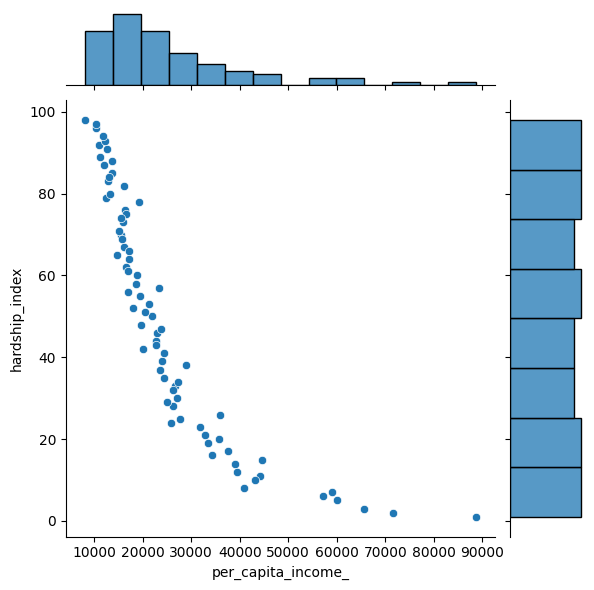

In [30]:
#6 Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot = sns.jointplot(x='per_capita_income_', y = 'hardship_index', data=df)
#plot.show()

In [33]:
#Exploring more correlations

#describing the data

df['hardship_index'].describe()

,hardship_index
count,77.000000
mean,49.506494
std,28.690556
min,1.000000
25%,25.000000
50%,50.000000
75%,74.000000
max,98.000000


In [34]:
df.describe()

,ca,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
count,77.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,39.000000,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.371857,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,1.000000,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,20.000000,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,39.000000,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,58.000000,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,77.000000,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [38]:
df.at[40, 'percent_aged_25_without_high_school_diploma']

4.3

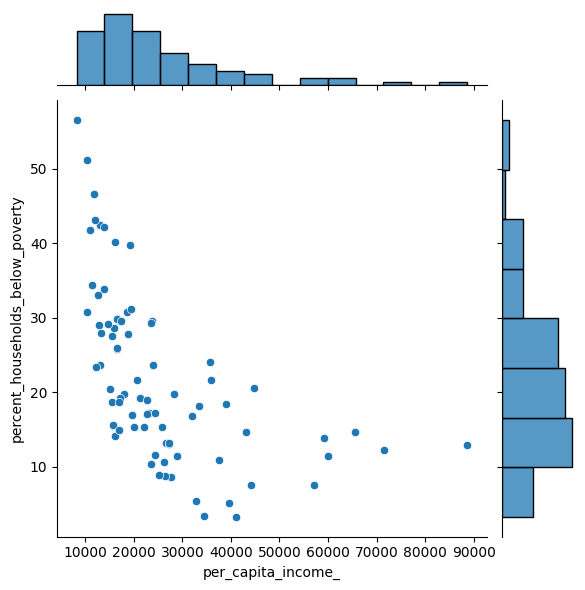

In [43]:
# analysing relationship between per_capita_income_ and percent_households_below_poverty

plot2 = sns.jointplot(data = df, y = 'percent_households_below_poverty', x = 'per_capita_income_')